In [1]:
import json

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets

from stellarpunk import util

# Loading and Preparing Data

In [2]:
#df_base = pd.json_normalize(list(json.loads(line) for line in open("/tmp/stellarpunk_test.history", "r")))
df_base = pd.read_json("/tmp/stellarpunk.history.gz", lines=True)
df_base = df_base.join(pd.json_normalize(df_base["o"]).add_prefix("o."))

In [3]:
eids = pd.Series(df_base["eid"].unique())

In [4]:
eids[pd.Series(df_base["eid"].unique()).str.startswith("2ccc83")]

84    2ccc8398-6be2-4201-86d9-a2892f35ca73
dtype: object

In [5]:
target_eid = df_base["eid"].unique()[84]
df_base = df_base[df_base["eid"] == target_eid].reset_index()
df_base["eid"].unique()

array(['2ccc8398-6be2-4201-86d9-a2892f35ca73'], dtype=object)

In [6]:
loc = pd.DataFrame(np.vstack(df_base["loc"]), columns=["loc.x", "loc.y"])
v = pd.DataFrame(np.vstack(df_base["v"]), columns=["v.x", "v.y"])

empty_array = np.empty(len(df_base))
empty_array[:] = np.nan

if "o.t_loc" in df_base:
    o_tloc = pd.DataFrame(np.vstack(df_base["o.t_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), columns=["o.t_loc.x", "o.t_loc.y"])
    o_tv = pd.DataFrame(np.vstack(df_base["o.t_v"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), columns=["o.t_v.x", "o.t_v.y"])
else:
    o_tloc = pd.DataFrame({"o.t_loc": empty_array, "o.t_loc.x": empty_array, "o.t_loc.y": empty_array})
    o_tv = pd.DataFrame({"o.t_v": empty_array, "o.t_v.x": empty_array, "o.t_v.y": empty_array})
    
if "o.ct" in df_base:
    o_ctloc = pd.DataFrame(np.vstack(df_base["o.ct_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), columns=["o.ct_loc.x", "o.ct_loc.y"])
    o_ctdv = pd.DataFrame(np.vstack(df_base["o.ct_dv"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), columns=["o.ct_dv.x", "o.ct_dv.y"])
else:
    o_ctloc = pd.DataFrame({"o.ct_loc": empty_array, "o.ct_loc.x": empty_array, "o.ct_loc.y": empty_array})
    o_ctdv = pd.DataFrame({"o.ct_dv": empty_array, "o.ct_dv.x": empty_array, "o.ct_dv.y": empty_array})
angle = pd.DataFrame(np.vstack(df_base.apply(lambda row: np.array(util.polar_to_cartesian(100, row["a"])), axis=1)), columns=["angle.x", "angle.y"])
df = pd.concat([df_base, loc, v, o_ctloc, o_ctdv, o_tloc, o_tv, angle], axis=1)

if "o.ct" not in df_base:
    df["o.ct"] = empty_array
    df["o.ct_ts"] = empty_array
    df["o.cac"] = empty_array
    df["o.cbdr"] = empty_array
    
if "o.t_loc" not in df_base:
    df["o.cs"] = empty_array

In [7]:
df["speed"] = np.linalg.norm(df[["v.x", "v.y"]], axis=1)
df["o_ct_dist"] = np.linalg.norm(np.vstack(df["loc"]) - np.vstack(df["o.ct_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), axis=1)
df["o_t_dist"] = np.linalg.norm(np.vstack(df["loc"]) - np.vstack(df["o.t_loc"].apply(lambda x: (np.nan, np.nan) if np.all(np.isnan(x)) else x)), axis=1)
df["o_t_speed"] = np.linalg.norm(df[["o.t_v.x", "o.t_v.y"]], axis=1)

In [8]:
df

,index,eid,ts,loc,a,v,av,o,o.o,o.nnd,...,o.t_loc.x,o.t_loc.y,o.t_v.x,o.t_v.y,angle.x,angle.y,speed,o_ct_dist,o_t_dist,o_t_speed
0,7282,2ccc8398-6be2-4201-86d9-a2892f35ca73,77.933333,"[5535.824758228578, -3533.485501225434]",-4.396990,"[348.27554323430707, -1241.5795864868267]",0.077139,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,6453.726376,...,7278.881261,-9747.368197,346.105602,-1233.843889,-31.019536,95.067284,1289.502122,NaN,6453.726376,1281.467842
1,7283,2ccc8398-6be2-4201-86d9-a2892f35ca73,77.950000,"[5541.629350615816, -3554.1784943335474]",-4.395705,"[347.1501878962772, -1237.5677681367167]",0.060472,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,6432.234674,...,7278.881261,-9747.368197,346.374768,-1234.803447,-31.141733,95.027325,1285.335456,NaN,6432.234674,1282.464437
2,7284,2ccc8398-6be2-4201-86d9-a2892f35ca73,77.966667,"[5547.415187080755, -3574.8046238024926]",-4.394697,"[346.3747679248164, -1234.8034465349779]",0.043805,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,6410.812416,...,7278.881261,-9747.368197,346.647668,-1235.776316,-31.237492,94.995890,1282.464437,NaN,6410.812416,1283.474857
3,7285,2ccc8398-6be2-4201-86d9-a2892f35ca73,77.983333,"[5553.188099879501, -3595.3846812447423]",-4.393967,"[346.3860214781967, -1234.843564718479]",0.060472,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,6389.438009,...,7278.881261,-9747.368197,344.442563,-1227.915263,-31.306839,94.973059,1282.506103,NaN,6389.438009,1275.310383
4,7286,2ccc8398-6be2-4201-86d9-a2892f35ca73,78.000000,"[5558.9612002374715, -3615.9654073233837]",-4.392959,"[345.26066614016685, -1230.831746368369]",0.043805,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,6368.062907,...,7278.881261,-9747.368197,344.713264,-1228.880292,-31.402543,94.941457,1278.339437,NaN,6368.062907,1276.312660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,10877,2ccc8398-6be2-4201-86d9-a2892f35ca73,137.850000,"[-26511.81241872962, -73583.7302109628]",-5.213675,"[-603.6946048775918, -1104.3244848875934]",-0.046903,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,403.358632,...,-26592.003599,-73979.037131,0.000000,0.000000,48.055342,87.696546,1258.562571,NaN,403.358632,0.000000
3596,10878,2ccc8398-6be2-4201-86d9-a2892f35ca73,137.866667,"[-26521.87399547758, -73602.13561904426]",-5.214456,"[-601.6959802196401, -1100.6684473347586]",-0.030237,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,383.370462,...,-26592.003599,-73979.037131,0.000000,0.000000,48.123881,87.658953,1254.395904,NaN,383.370462,0.000000
3597,10879,2ccc8398-6be2-4201-86d9-a2892f35ca73,137.883333,"[-26531.902261814575, -73620.48009316651]",-5.214960,"[-599.6973555616884, -1097.012409781924]",-0.013570,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,363.559238,...,-26592.003599,-73979.037131,0.000000,0.000000,48.168050,87.634690,1250.229237,NaN,363.559238,0.000000
3598,10880,2ccc8398-6be2-4201-86d9-a2892f35ca73,137.900000,"[-26541.897217740603, -73638.76363332954]",-5.215186,"[-597.6987309037366, -1093.3563722290892]",0.003097,"{'o': 'stellarpunk.orders.GoToLocation', 'nnd'...",stellarpunk.orders.GoToLocation,343.942877,...,-26592.003599,-73979.037131,0.000000,0.000000,48.187868,87.623794,1246.062571,NaN,343.942877,0.000000


# Basic Ship Vitals

## Position and Heading

In [9]:
def plot_location_chart(max_time):
    sample = df[df["ts"] <= max_time].iloc[::50]
    plt.quiver(sample["loc.x"], sample["loc.y"], sample["angle.x"], sample["angle.y"])#, scale=100)
    plt.scatter(sample["o.t_loc.x"], sample["o.t_loc.y"])
    #center = (0,2500)
    #radius = 10000
    #plt.xlim(center[0]-radius,center[0]+radius)
    #plt.ylim(center[1]-radius,center[1]+radius)

ipywidgets.interact(plot_location_chart, max_time=ipywidgets.FloatSlider(value=df["ts"].max(), min=df["ts"].min(), max=df["ts"].max(), continuous_update=False))

interactive(children=(FloatSlider(value=137.91666666666856, continuous_update=False, description='max_time', m…

<function __main__.plot_location_chart(max_time)>

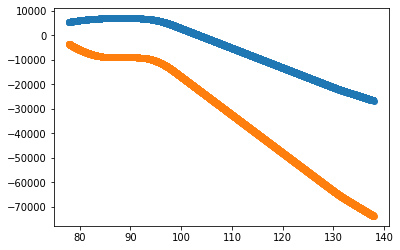

In [10]:
plt.scatter(df["ts"], df["loc.x"])
plt.scatter(df["ts"], df["loc.y"])

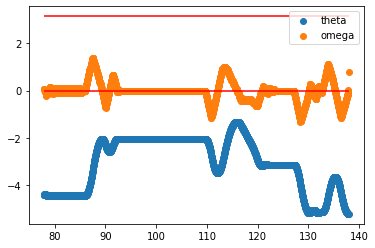

In [11]:

plt.scatter(df["ts"], df["a"], label="theta")
plt.scatter(df["ts"], df["av"], label="omega")
plt.hlines(np.pi, df["ts"].min(), df["ts"].max(), color="red")
plt.hlines(0, df["ts"].min(), df["ts"].max(), color="red")
plt.legend()


## Velocity and Acceleration

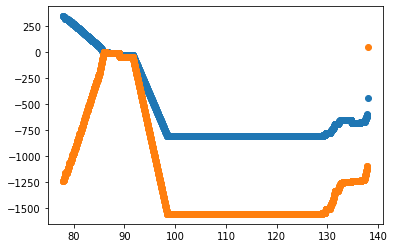

In [12]:
plt.scatter(df["ts"], df["v.x"])
plt.scatter(df["ts"], df["v.y"])

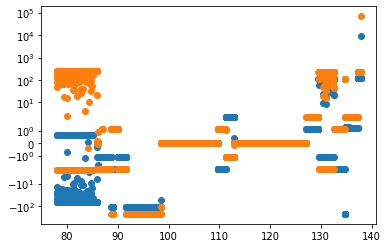

In [13]:
#plt.scatter(df["ts"], (df["v.x"] - df["v.x"].shift(-1)))#/(df["ts"]-df["ts"].shift(-1)))
plt.scatter(df["ts"], (df["v.x"].shift(1) - df["v.x"]) / (df["ts"].shift(1) - df["ts"]))
plt.scatter(df["ts"], (df["v.y"].shift(1) - df["v.y"]) / (df["ts"].shift(1) - df["ts"]))
plt.yscale("symlog")


# Behavior Monitoring

In [14]:
def plot_collision_info(hist_length, max_time):
    sample = df[(df["ts"] >= max_time - hist_length) & (df["ts"] <= max_time)]
    plt.scatter(sample["ts"], (~(sample["o.ct"].isna())).astype(int), label="ct")
    plt.scatter(sample["ts"], sample["o.cs"].fillna(0).astype(int)+0.05, label="cs")
    plt.scatter(sample["ts"], sample["o.cac"].fillna(0).astype(int)+0.1, label="cac")
    plt.scatter(sample["ts"], sample["o.cbdr"].fillna(0).astype(int)+0.15, label="cbdr")
    plt.legend()

ipywidgets.interact(plot_collision_info, hist_length=ipywidgets.FloatSlider(value=5, min=0, max=df["ts"].max()-df["ts"].min(), continuous_update=False), max_time=ipywidgets.FloatSlider(value=df["ts"].max(), min=df["ts"].min(), max=df["ts"].max()+1, continuous_update=False))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='hist_length', max=59.983333…

<function __main__.plot_collision_info(hist_length, max_time)>

## Target Location

In [15]:
if np.any(~df["o.t_loc"].isna()):
    x = df.groupby(["o.t_loc.x", "o.t_loc.y"])["ts"].describe().sort_values(["min"])
x

,,count,mean,std,min,25%,50%,75%,max
o.t_loc.x,o.t_loc.y,,,,,,,,
7278.881261,-9747.368197,481.0,81.933333,2.316617,77.933333,79.933333,81.933333,83.933333,85.933333
-26592.003599,-73979.037131,3118.0,111.941667,15.003890,85.966667,98.954167,111.941667,124.929167,137.916667


In [16]:
if np.any(~df["o.t_loc"].isna()):
    x = df.groupby(["o.t_loc.x", "o.t_loc.y"])["o_t_dist"].describe()
x

,,count,mean,std,min,25%,50%,75%,max
o.t_loc.x,o.t_loc.y,,,,,,,,
-26592.003599,-73979.037131,3118.0,42136.808504,24017.573465,324.543335,20674.527266,43402.650697,66130.763168,73277.045296
7278.881261,-9747.368197,481.0,2849.168695,1662.477774,908.564373,1340.839020,2427.456724,4151.206653,6453.726376


(324.54333498630774, 324.54333498630774)

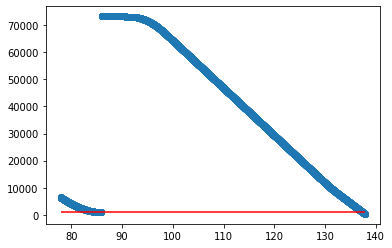

In [17]:
plt.scatter(df["ts"], df["o_t_dist"])
plt.hlines(1000, df["ts"].min(), df["ts"].max(), color="red")
df["o_t_dist"].min(),df[df["ts"] > df["ts"].max()-1]["o_t_dist"].min()

(0.0, 1837.5000000000005)

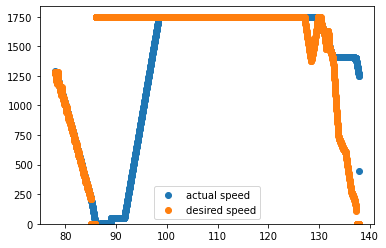

In [18]:
plt.scatter(df["ts"], df["speed"], label="actual speed")
plt.scatter(df["ts"], df["o_t_speed"], label="desired speed")
plt.legend()
plt.ylim(0)

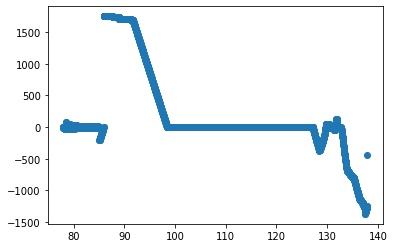

In [19]:
plt.scatter(df["ts"], df["o_t_speed"] - df["speed"])

## Collision Avoidance

In [20]:
if np.any(~df["o.ct"].isna()):
    x = df.groupby("o.ct")["ts"].describe()
else:
    x = "no collision threats"
x

,count,mean,std,min,25%,50%,75%,max
o.ct,,,,,,,,
2bcc334f-ad77-43fa-8de6-3ede958c171a,78.0,89.226709,0.798313,85.983333,89.070833,89.391667,89.712500,90.033333
74bcec03-fe06-45c5-86f3-155fef9c8520,94.0,110.458333,0.454657,109.683333,110.070833,110.458333,110.845833,111.233333
960a55a3-5c61-4981-81c0-f62c76086d51,1.0,86.000000,NaN,86.000000,86.000000,86.000000,86.000000,86.000000
de5c3905-5bd1-456c-b665-bcd02f2e544a,129.0,133.716667,0.623053,132.650000,133.183333,133.716667,134.250000,134.783333


In [21]:
if np.any(~df["o.ct"].isna()):
    x = df.groupby("o.ct")["o_ct_dist"].describe()
else:
    x = "no collision threats"
x

,count,mean,std,min,25%,50%,75%,max
o.ct,,,,,,,,
2bcc334f-ad77-43fa-8de6-3ede958c171a,78.0,886.618093,12.591733,865.654324,875.856004,886.390607,897.245880,908.557898
74bcec03-fe06-45c5-86f3-155fef9c8520,94.0,45119.406845,795.189537,43764.045469,44441.671388,45119.346381,45797.086480,46475.073649
960a55a3-5c61-4981-81c0-f62c76086d51,1.0,36683.614787,NaN,36683.614787,36683.614787,36683.614787,36683.614787,36683.614787
de5c3905-5bd1-456c-b665-bcd02f2e544a,129.0,3143.122715,1488.046722,650.236096,1858.885408,3133.863193,4417.860455,5704.779002


(0.0, 48783.82733189761)

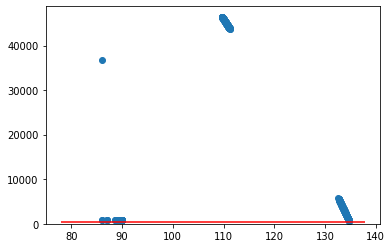

In [22]:
plt.scatter(df["ts"], df["o_ct_dist"])
plt.hlines(300, df["ts"].min(), df["ts"].max(), color="red")
plt.ylim(0)

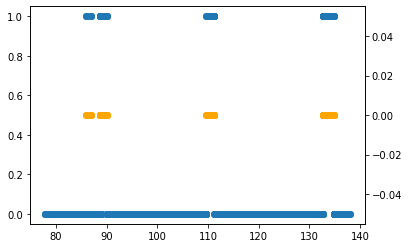

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.scatter(df["ts"], 1-df["o.ct"].isna().astype(int))
ax2.scatter(df["ts"], df["ts"] - df["o.ct_ts"], color="orange")

#ax2.set_ylim(0,(df["ts"] - df["o.ct_ts"]).max()*1.2)

# History Visualization

## Position and Velocity

In [24]:
def plot_collision_chart(hist_length=df["ts"].max(), max_time=df["ts"].max()):
    plt.figure(figsize=(10, 10))
    sample = df[(df["ts"] >= max_time - hist_length) & (df["ts"] <= max_time)].iloc[::20]
    plt.quiver(sample["loc.x"], sample["loc.y"], sample["v.x"], sample["v.y"], label="v")
    ctdv_df = sample[~(sample["o.ct_dv"].isna())]
    plt.quiver(ctdv_df["loc.x"], ctdv_df["loc.y"], ctdv_df["o.ct_dv.x"], ctdv_df["o.ct_dv.y"], label="ctdv", color="orange")
    plt.quiver(sample["loc.x"], sample["loc.y"], sample["o.t_v.x"], sample["o.t_v.y"], label="tv", color="purple")
    cmap = plt.get_cmap('viridis')
    for x, c in zip(df["o.ct"].unique(), cmap(np.linspace(0, 1, len(df["o.ct"].unique())))):
        if not isinstance(x, str):
            continue
        ct = sample[sample["o.ct"] == x]
        if len(ct) == 0:
            continue
        plt.scatter(ct["o.ct_loc.x"], ct["o.ct_loc.y"], color=c, label=x[:8])
    plt.scatter(sample["o.t_loc.x"], sample["o.t_loc.y"], label="t_loc")
    plt.axis('equal')
    #center = (-33555, -5000)
    #radius = 15000
    #plt.xlim(center[0]-radius,center[0]+radius)
    #plt.ylim(center[1]-radius,center[1]+radius)

    plt.legend()
    plt.show()
    
ipywidgets.interact(plot_collision_chart, hist_length=ipywidgets.FloatSlider(value=5, min=0, max=df["ts"].max()-df["ts"].min(), continuous_update=False), max_time=ipywidgets.FloatSlider(value=df["ts"].max(), min=df["ts"].min(), max=df["ts"].max(), continuous_update=False))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='hist_length', max=59.983333…

<function __main__.plot_collision_chart(hist_length=137.91666666666856, max_time=137.91666666666856)>

## Position and Heading

In [25]:
def plot_collision_chart(hist_length=df["ts"].max(), max_time=df["ts"].max()):
    sample = df[(df["ts"] >= max_time - hist_length) & (df["ts"] <= max_time)].iloc[::20]
    plt.quiver(sample["loc.x"], sample["loc.y"], sample["angle.x"], sample["angle.y"], label="ship")
    ctdv_df = sample[~(sample["o.ct_dv"].isna())]
    plt.quiver(ctdv_df["loc.x"], ctdv_df["loc.y"], ctdv_df["o.ct_dv.x"], ctdv_df["o.ct_dv.y"], label="ctdv", color="orange")
    plt.quiver(sample["loc.x"], sample["loc.y"], sample["o.t_v.x"], sample["o.t_v.y"], label="tv", color="purple")
    cmap = plt.get_cmap('viridis')
    for x, c in zip(df["o.ct"].unique(), cmap(np.linspace(0, 1, len(sample["o.ct"].unique())))):
        if not isinstance(x, str):
            continue
        ct = sample[sample["o.ct"] == x]
        plt.scatter(ct["o.ct_loc.x"], ct["o.ct_loc.y"], color=c, label=x[:8])
    plt.scatter(sample["o.t_loc.x"], sample["o.t_loc.y"], label="t_loc")
    #plt.axis('square')
    #center = (-33555, -5000)
    #radius = 15000
    #plt.xlim(center[0]-radius,center[0]+radius)
    #plt.ylim(center[1]-radius,center[1]+radius)

    plt.legend()
    plt.axis('equal')
    plt.show()
    
ipywidgets.interact(plot_collision_chart, hist_length=ipywidgets.FloatSlider(value=5, min=0, max=df["ts"].max()-df["ts"].min(), continuous_update=False), max_time=ipywidgets.FloatSlider(value=df["ts"].max(), min=df["ts"].min(), max=df["ts"].max(), continuous_update=False))

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='hist_length', max=59.983333…

<function __main__.plot_collision_chart(hist_length=137.91666666666856, max_time=137.91666666666856)>

# 